In [2]:
import numpy as np
import cv2
from PIL import Image, ImageDraw
import requests
import matplotlib.pyplot as plt

In [65]:
IMAGE_SHAPE = (400, 400)

(3000, 1997)
0


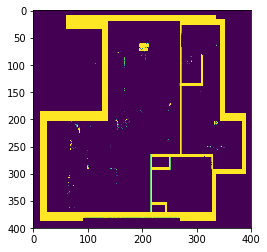

In [69]:
# image gathering
image_url = "https://www.estate-eu.com/images/statji/chto-takoe-1kk-i-kakie-v-chehii-planirovki-kvartir.jpg"

def read_image_from_url(im_url):
    response = requests.get(im_url, stream=True).raw
    return Image.open(response)

def rgb2bw_coverter(im):
    gray = im.convert('L')
    bw = gray.point(lambda x: 255 if x<30 else 0)
    return bw

img = read_image_from_url(image_url)
img_arr = np.asarray(img)
img_arr = cv2.resize(img_arr, IMAGE_SHAPE)
print(img.size)

img_bw = rgb2bw_coverter(img)
bw_arr = np.asarray(img_bw)
bw_arr = cv2.resize(bw_arr, IMAGE_SHAPE)

plt.imshow(bw_arr)
print(np.min(img_bw))

[[219 370 242 370]]


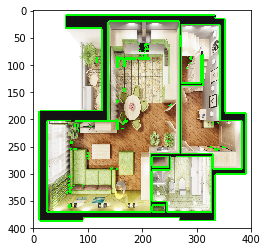

In [80]:
# detect lines
gray = cv2.cvtColor(img_arr,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(bw_arr,100,200,apertureSize = 3)
plt.imshow(edges)

minLineLength = 10
maxLineGap = 0
lines = cv2.HoughLinesP(edges,1,np.pi/180,10,minLineLength,maxLineGap)
for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        cv2.line(img_arr,(x1,y1),(x2,y2),(0,255,0),2)

plt.imshow(img_arr)
print(lines[1])

In [ ]:
# detect walls